## Data log 에 관하여 


- Final goal : click 율을 높힐 수 있는 방법을 찾자.

- 1차 목적 : log data 파악 (기준 action_type별로) 

- 1차 질문 : Conversion Rate를 알 수 있는가? 알 수 없음..

        Funnel 별 이탈률 - **DAU 기준**? **Session **기준? 
        * DAU (Daily Active User) / Session(total visit-방문 할 때 마다 증가하는 수치를 의미한다.) 
        

      : 재방문율(retention)은 어떠한가 ? - 동일한 uid를 가지고 있는 사람의 방문수를 분석 
      
      : 분석의 한계점 및 논의/개선 사항에 대하여? 

- 2차 목적 : action_type 별로 행동의 패턴을 세분화하여 시간별 패턴을 파악해보려함. >> 핵심그룹 타겟팅
- 2차 질문 : 상위 10개 지역별 유저의 행동 패턴의 차이? 
         : action_type 에 따른 카테고리별 파악 view 에서 가구수가 많이 찍혔다면, 그 카테고리에 marketing 적인 시도를 할 수 있지 않을까? 
         

* 아하-모먼트 : 사용자가 제품을 사용하면서 가치를 발견하는 순간을 말한다. 
 - A-ha 모먼트를 경험한 유저들을 서비스를 계속 사용하게 되고, 이것을 경험하지 못한 유저가 계속 쓰지 않게 되는 현상. 
 - 아하 모먼트의 기준 : X 라는 행동을 가입한지 Y라는 날짜 안에 Z 번 한다. 

* 상관관계가 아닌 인과관계를 찾는것이 중요하다. - 인과관계 분석 




In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
import warnings 
warnings.filterwarnings('ignore')

%matplotlib inline 

In [ ]:
filename = '/content/drive/MyDrive/data/a1_factory /data/log_csv.csv'
log = pd.read_csv(filename , index_col = 0, parse_dates = ['collect_time'])

In [ ]:
log_cp = log.copy()

In [ ]:
log_cp.set_index('collect_time', inplace = True)

In [ ]:
log_cp = log_cp.sort_index(ascending=True)
log_cp.head()

,uid,action_type,category1,category2,category3,geoip_city_name,useragent_os,viewrate,viewtime
collect_time,,,,,,,,,
2022-12-22 00:00:00,PUiJdmOi9ZcADXtx,View,가구,행거·옷장,행거,Jungnang-gu,Mac OS X,100.0,48015
2022-12-22 00:00:01,ch2Z1WDxeWsADNoO,View,가구,거울,전신거울,Hwaseong-si,Mac OS X,100.0,110654
2022-12-22 00:00:01,Pf2LhGOjGFEADj1W,Highlight,조명,장스탠드,NaN,Seongnam-si,Windows,0.0,0
2022-12-22 00:00:01,2ugHxGMJssgAAxNY,View,수납·정리,옷걸이,바지·치마걸이,Seoul,Android,100.0,222355
2022-12-22 00:00:01,NaN,View,가구,소파,일반소파,Seocho-gu,Android,0.0,0


In [ ]:
log_cp['day'] = log_cp.index.day
log_cp['month'] = log_cp.index.month
log_cp

,uid,action_type,category1,category2,category3,geoip_city_name,useragent_os,viewrate,viewtime,day,month
collect_time,,,,,,,,,,,
2022-12-22 00:00:00,PUiJdmOi9ZcADXtx,View,가구,행거·옷장,행거,Jungnang-gu,Mac OS X,100.0,48015,22,12
2022-12-22 00:00:01,ch2Z1WDxeWsADNoO,View,가구,거울,전신거울,Hwaseong-si,Mac OS X,100.0,110654,22,12
2022-12-22 00:00:01,Pf2LhGOjGFEADj1W,Highlight,조명,장스탠드,NaN,Seongnam-si,Windows,0.0,0,22,12
2022-12-22 00:00:01,2ugHxGMJssgAAxNY,View,수납·정리,옷걸이,바지·치마걸이,Seoul,Android,100.0,222355,22,12
2022-12-22 00:00:01,NaN,View,가구,소파,일반소파,Seocho-gu,Android,0.0,0,22,12
...,...,...,...,...,...,...,...,...,...,...,...
2022-12-30 13:59:59,PWmyWWLCQaIACian,View,가전·디지털,TV,"~109cm(~43"")",Daejeon,Windows,100.0,414,30,12
2022-12-30 13:59:59,yoiUPmOub5YACv3H,View,수납·정리,서랍장·트롤리,트롤리·이동식선반,Seoul,iOS,100.0,24722,30,12
2022-12-30 13:59:59,KlKoJGE9yeEACCVI,View,가구,서랍·수납장,협탁,Gangneung,Windows,100.0,3007,30,12


In [ ]:

# 일자별로 uid 중복행을 - 재방문으로 보고 비율 표시 :  Retention을 어떻게 

In [ ]:
log_cp.groupby(['uid']).day



In [ ]:
# data information 
def df_info(df):
  print('data set information: \n')
  print(df.info())

  print('data set describe check : \n')
  print(df.describe())

df_info(log)


data set information: 

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5659541 entries, 0 to 5659540
Data columns (total 10 columns):
 #   Column           Dtype         
---  ------           -----         
 0   uid              object        
 1   action_type      object        
 2   category1        object        
 3   category2        object        
 4   category3        object        
 5   collect_time     datetime64[ns]
 6   geoip_city_name  object        
 7   useragent_os     object        
 8   viewrate         float64       
 9   viewtime         int64         
dtypes: datetime64[ns](1), float64(1), int64(1), object(7)
memory usage: 475.0+ MB
None
data set describe check : 

           viewrate      viewtime
count  5.657112e+06  5.659541e+06
mean   7.677686e+01  5.126022e+04
std    4.221447e+01  5.810345e+05
min    0.000000e+00  0.000000e+00
25%    1.000000e+02  8.940000e+02
50%    1.000000e+02  1.010400e+04
75%    1.000000e+02  4.800500e+04
max    1.000000e+02  8.636989e+

In [ ]:
log.isnull().sum()

uid                186313
action_type             0
category1               0
category2               0
category3          780006
collect_time            0
geoip_city_name    417032
useragent_os            0
viewrate             2429
viewtime                0
dtype: int64

In [ ]:
log[log.category3.isnull()] #null값의 형태 확인


,uid,action_type,category1,category2,category3,collect_time,geoip_city_name,useragent_os,viewrate,viewtime
6,Adwku2KoPCwAANbw,View,노하우,꾸미기팁,NaN,2022-12-29 09:13:14,Gwanak-gu,Windows,100.0,37161
21,fAWTRWOtPKAABl9P,View,가구,서랍·수납장,NaN,2022-12-29 16:09:37,Seongbuk-gu,Windows,100.0,7036
54,fYx4OGJwcR4AB+zb,View,조명,단스탠드,NaN,2022-12-29 09:32:21,Seongnam-si,Windows,100.0,2377
61,avXJTWNh0KoAATnH,View,노하우,꾸미기팁,NaN,2022-12-29 15:56:42,Paju,Windows,100.0,134250
66,0nWGIGNbMn4ACm6Q,View,노하우,지식백과,NaN,2022-12-29 14:51:55,Jeonju,Windows,100.0,141057
...,...,...,...,...,...,...,...,...,...,...
5659495,2icuqmNMnKMAATWT,View,수납·정리,빨래바구니·햄퍼,NaN,2022-12-28 14:26:18,Seoul,Windows,100.0,43181
5659519,dihYQ2Jp53kABkx/,View,가전·디지털,음향가전,NaN,2022-12-28 12:23:51,Gwangju,Windows,100.0,36011
5659524,Ae06eGOr4WcACDEv,View,주방용품,보관·용기·도시락,NaN,2022-12-28 17:04:42,Gwangju,iOS,100.0,135321
5659526,dCFkG2J3qToAAf3A,View,패브릭,O!STYLING,NaN,2022-12-29 18:51:06,Seoul,iOS,0.0,0


In [ ]:

# data 결측값 처리 
log_null_ts = log.copy()
drop_city = log_null_ts[log_null_ts['geoip_city_name'] != 'Seoul']
drop_city = drop_city[drop_city['geoip_city_name'] != 'Gyeonggi-do']


drop_city.isnull().sum().sort_values(ascending=False)

category3          643126
geoip_city_name    417032
uid                132162
viewrate             1722
action_type             0
category1               0
category2               0
collect_time            0
useragent_os            0
viewtime                0
dtype: int64

In [ ]:
log_drop_null = drop_city 
log_drop_null['geoip_city_name'].fillna('un_city_name', inplace = True)
log_drop_null['category3'].fillna('un_category', inplace = True)
log_drop_null['uid'].fillna('unname',inplace= True)
log_drop_null.dropna(axis= 0, inplace =True)
print(log_drop_null.isnull().sum().sort_values(ascending=False))

uid                0
action_type        0
category1          0
category2          0
category3          0
collect_time       0
geoip_city_name    0
useragent_os       0
viewrate           0
viewtime           0
dtype: int64


In [ ]:
log_drop_null

,uid,action_type,category1,category2,category3,collect_time,geoip_city_name,useragent_os,viewrate,viewtime
0,avpKyWMn/xEADNlb,View,주방용품,그릇·홈세트,식판·나눔접시,2022-12-29 17:29:02,Seongnam-si,Windows,100.0,80033
1,0+5vEmGkOuAAB5j2,Basket,패브릭,매트,주방·다용도매트,2022-12-29 12:56:38,Yongin-si,Windows,0.0,0
3,dC9Fl2Ly9lcADrTn,Highlight,데코·식물,플라워·식물,화병·화분,2022-12-29 17:54:30,Gwangmyeong-si,Windows,0.0,0
4,09gKcGLg0I8ACyQy,View,가구,진열장·책장,책장,2022-12-29 18:45:05,Jongno-gu,Mac OS X,100.0,1238
5,091fXGIDYFEABcpA,Basket,수납·정리,화장대·테이블정리,티슈커버·케이스,2022-12-29 17:53:11,Incheon,Windows,0.0,0
...,...,...,...,...,...,...,...,...,...,...
5659533,3yfy5mOZpbYAAMpw,View,가전·디지털,주방가전,오븐·전자레인지,2022-12-29 12:45:14,Gangnam-gu,Android,100.0,6054
5659534,qE73wWOr1C8ABhBw,View,캠핑용품,캠핑생활용품,기타캠핑생활용품,2022-12-28 15:40:29,Songpa-gu,Windows,100.0,10006
5659537,PVMstmNg4I4ADq9R,Basket,가구,진열장·책장,책장,2022-12-28 14:30:09,Jinju,Windows,0.0,0
5659538,diRXdmN49dUABrVo,View,가구,테이블·식탁·책상,식탁,2022-12-29 12:45:13,Gunpo,Android,100.0,47217


In [ ]:
# uid 의 중복을 없앰
log_new = log_drop_null.drop_duplicates(['uid'])

In [ ]:
log_new

,uid,action_type,category1,category2,category3,collect_time,geoip_city_name,useragent_os,viewrate,viewtime
0,avpKyWMn/xEADNlb,View,주방용품,그릇·홈세트,식판·나눔접시,2022-12-29 17:29:02,Seongnam-si,Windows,100.0,80033
1,0+5vEmGkOuAAB5j2,Basket,패브릭,매트,주방·다용도매트,2022-12-29 12:56:38,Yongin-si,Windows,0.0,0
3,dC9Fl2Ly9lcADrTn,Highlight,데코·식물,플라워·식물,화병·화분,2022-12-29 17:54:30,Gwangmyeong-si,Windows,0.0,0
4,09gKcGLg0I8ACyQy,View,가구,진열장·책장,책장,2022-12-29 18:45:05,Jongno-gu,Mac OS X,100.0,1238
5,091fXGIDYFEABcpA,Basket,수납·정리,화장대·테이블정리,티슈커버·케이스,2022-12-29 17:53:11,Incheon,Windows,0.0,0
...,...,...,...,...,...,...,...,...,...,...
5659447,DiETNWGKOwMADDsp,View,가전·디지털,태블릿PC,태블릿PC,2022-12-28 17:18:27,Yongin-si,Windows,100.0,7572
5659459,amWDVmOr0ycAB/2J,View,가구,테이블·식탁·책상,사이드테이블,2022-12-28 22:12:53,Gangbuk-gu,iOS,100.0,287291
5659462,DiaRu2I60NgACwX7,View,노하우,건축&주택,un_category,2022-12-29 10:54:12,Seongnam-si,Windows,100.0,228039
5659472,0/usD2Os6BcACzMc,View,패브릭,매트리스커버,un_category,2022-12-29 10:07:13,Changwon,Windows,100.0,58595


In [ ]:
non_basket = log_new[log_new['action_type'] != 'Basket']
non_basket

,uid,action_type,category1,category2,category3,collect_time,geoip_city_name,useragent_os,viewrate,viewtime
0,avpKyWMn/xEADNlb,View,주방용품,그릇·홈세트,식판·나눔접시,2022-12-29 17:29:02,Seongnam-si,Windows,100.0,80033
3,dC9Fl2Ly9lcADrTn,Highlight,데코·식물,플라워·식물,화병·화분,2022-12-29 17:54:30,Gwangmyeong-si,Windows,0.0,0
4,09gKcGLg0I8ACyQy,View,가구,진열장·책장,책장,2022-12-29 18:45:05,Jongno-gu,Mac OS X,100.0,1238
6,Adwku2KoPCwAANbw,View,노하우,꾸미기팁,un_category,2022-12-29 09:13:14,Gwanak-gu,Windows,100.0,37161
7,tOQhrWGfQcAACo9B,View,가구,테이블·식탁·책상,책상,2022-12-29 15:32:12,Gangnam-gu,Windows,100.0,8483
...,...,...,...,...,...,...,...,...,...,...
5659447,DiETNWGKOwMADDsp,View,가전·디지털,태블릿PC,태블릿PC,2022-12-28 17:18:27,Yongin-si,Windows,100.0,7572
5659459,amWDVmOr0ycAB/2J,View,가구,테이블·식탁·책상,사이드테이블,2022-12-28 22:12:53,Gangbuk-gu,iOS,100.0,287291
5659462,DiaRu2I60NgACwX7,View,노하우,건축&주택,un_category,2022-12-29 10:54:12,Seongnam-si,Windows,100.0,228039
5659472,0/usD2Os6BcACzMc,View,패브릭,매트리스커버,un_category,2022-12-29 10:07:13,Changwon,Windows,100.0,58595


In [ ]:
geo_rank = non_basket.loc[:,'geoip_city_name'].value_counts()[1:10]
geo_rank
# 많이 이용하는 지역 상위 10개 

Busan          30033
Incheon        26633
Daegu          23823
Seongnam-si    18937
Daejeon        18709
Gwangju        17863
Suwon          17087
Yongin-si      16550
Gangnam-gu     14908
Name: geoip_city_name, dtype: int64

In [ ]:
geo_rank.index

Index(['Busan', 'Incheon', 'Daegu', 'Seongnam-si', 'Daejeon', 'Gwangju',
       'Suwon', 'Yongin-si', 'Gangnam-gu'],
      dtype='object')

In [ ]:
# 지역 상위 10개 내에서 action_type별 행동 분석 why? 
# 지역별 category 어떤 category의 선호도가 높은지 ? 전체적인 흐름과 비슷한 선호도를 보이고 있는가? 
filter = (non_basket['geoip_city_name'] == 'Busan') & (non_basket['action_type'] =='View') 
busan_view = non_basket[filter]
busan_view

,uid,action_type,category1,category2,category3,collect_time,geoip_city_name,useragent_os,viewrate,viewtime
27,eZBeZ2GDmxMAA7AM,View,가구,서랍·수납장,수납장,2022-12-29 11:39:18,Busan,Windows,100.0,16164
58,G3VZr2L7PcUACeaU,View,패브릭,홈패브릭,담요·블랭킷,2022-12-29 10:09:17,Busan,Android,100.0,3400
182,0rTXAmOtE08ADdVm,View,가구,서랍·수납장,주방수납장,2022-12-29 13:22:18,Busan,Windows,100.0,11012
191,ei+4MWL+soMADPvJ,View,가구,테이블·식탁·책상,un_category,2022-12-24 23:16:52,Busan,Android,100.0,14031
194,3FSihmNzOpYABmd/,View,먼데이하우스,가구,테이블·식탁·책상,2022-12-26 15:53:22,Busan,Windows,100.0,7036
...,...,...,...,...,...,...,...,...,...,...
5656853,d0Ge1WOtMlAADBp+,View,가구,테이블·식탁·책상,식탁,2022-12-29 15:26:12,Busan,Windows,100.0,12656
5657141,dW8Ou2Kaok0ADtRJ,View,노하우,청소,un_category,2022-12-29 14:18:48,Busan,Android,100.0,42876
5657757,3yfSmWNEAQ4ADes/,View,가구,침대,침대+매트리스,2022-12-28 08:12:16,Busan,Android,0.0,0
5658369,3Y2sYGOrHFMADSmp,View,주방용품,칼·커팅기구,칼세트,2022-12-28 14:43:39,Busan,iOS,100.0,43037


In [ ]:
busan_view['category1'].value_counts()[:10]

가구        8445
가전·디지털    4030
노하우       2649
패브릭       2644
주방용품      2644
데코·식물     2331
생활용품      1363
수납·정리     1043
공구·DIY     793
조명         769
Name: category1, dtype: int64

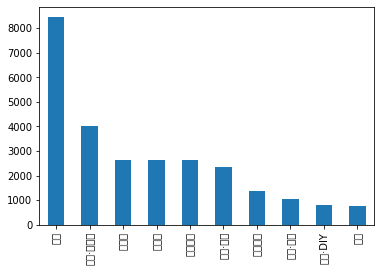

In [ ]:
busan_view['category1'].value_counts()[:10].plot.bar()

In [ ]:
# highlight 
filter = (non_basket['geoip_city_name'] == 'Busan') & (non_basket['action_type'] =='Highlight') 
busan_highlight = non_basket[filter]
busan_highlight

,uid,action_type,category1,category2,category3,collect_time,geoip_city_name,useragent_os,viewrate,viewtime
616,avD3ymNoPuoADcCj,Highlight,생활용품,세탁용품,빨래건조대,2022-12-29 13:38:23,Busan,Windows,0.0,0
955,Oxg1Q2Ho6v0ADE5v,Highlight,주방용품,컵·잔·텀블러,맥주잔,2022-12-22 10:50:48,Busan,Windows,0.0,0
976,duspm2OnOfoAAdRV,Highlight,수납·정리,화장대·테이블정리,소품정리·거치대,2022-12-25 02:42:37,Busan,iOS,0.0,0
1169,ebHacGJiDykADpiC,Highlight,가전·디지털,계절가전,가습기,2022-12-24 13:47:23,Busan,Android,0.0,0
1680,avudWWNGMNkAA1oL,Highlight,가전·디지털,계절가전,공기청정기,2022-12-26 12:23:43,Busan,Windows,0.0,0
...,...,...,...,...,...,...,...,...,...,...
4965035,dCzDimMTNIgADmZI,Highlight,노하우,청소,un_category,2022-12-23 21:33:43,Busan,Windows,0.0,0
5107436,didx8WOr1/UACy6P,Highlight,노하우,수납,un_category,2022-12-28 14:46:08,Busan,iOS,0.0,0
5416668,PU9OpWOm7bUAARgp,Highlight,패브릭,이불·이불솜,이불,2022-12-24 21:21:23,Busan,Windows,0.0,0
5494331,07binWOr7TYAAbG3,Highlight,주방용품,컵·잔·텀블러,와인·양주·칵테일잔,2022-12-28 16:16:42,Busan,iOS,0.0,0


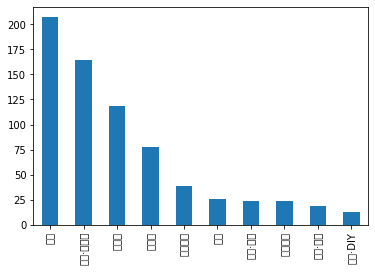

In [ ]:
busan_highlight['category1'].value_counts()[:10].plot.bar()

In [ ]:
# action_type별 viewtime의 평균 

list = non_basket['action_type'].value_counts()
act_lst = list.index.to_list()
print(act_lst)
# for act_type in act_lst :
#   view_df = non_basket[non_basket['action_type'] == str(act_lst)]

#   print(view_df['viewtime'].mean())

['View', 'Highlight', 'SINF', 'Copy']


In [ ]:
view_df = non_basket[non_basket['action_type'] == 'View']
view_df['viewtime'].mean()

72942.07208413526

# DAU
 Daily Active User 일일 활성 사용자 수 
 

In [ ]:
type(log_drop_null['collect_time'][0])

pandas._libs.tslibs.timestamps.Timestamp

In [ ]:
log_drop_null.sort_values(by='collect_time',inplace=True)

In [ ]:
log_drop_null

,uid,action_type,category1,category2,category3,collect_time,geoip_city_name,useragent_os,viewrate,viewtime
479048,PUiJdmOi9ZcADXtx,View,가구,행거·옷장,행거,2022-12-22 00:00:00,Jungnang-gu,Mac OS X,100.0,48015
3893008,Pf2LhGOjGFEADj1W,Highlight,조명,장스탠드,un_category,2022-12-22 00:00:01,Seongnam-si,Windows,0.0,0
185259,unname,View,가구,소파,일반소파,2022-12-22 00:00:01,Seocho-gu,Android,0.0,0
132990,ch2Z1WDxeWsADNoO,View,가구,거울,전신거울,2022-12-22 00:00:01,Hwaseong-si,Mac OS X,100.0,110654
4892838,Ok/iZGNvpQIADwDS,Highlight,가구,소파,일반소파,2022-12-22 00:00:01,Sejong,Windows,0.0,0
...,...,...,...,...,...,...,...,...,...,...
5574023,07idymOQWBQABDlw,Copy,패브릭,커튼·부자재,암막커튼,2022-12-30 13:59:59,Busan,Windows,0.0,0
3592283,fYx4OGN0PJUACMDT,View,패브릭,매트,현관·발매트,2022-12-30 13:59:59,Seongnam-si,Windows,0.0,0
5561628,diIj92OSuiwACGvT,View,주방용품,주방수납·정리,수세미걸이·세제통,2022-12-30 13:59:59,Cheonan,Windows,100.0,17172
5611799,avXigmJ8inIAAe8q,View,데코·식물,데스크·디자인문구,데스크테리어,2022-12-30 13:59:59,Jongno-gu,Windows,100.0,48038


In [ ]:
min_grouped = log_drop_null.groupby(['uid'])['collect_time'].min()

In [ ]:

max_grouped = log_drop_null.groupby(['uid'])['collect_time'].max()

In [ ]:
max_time_df = pd.DataFrame(max_grouped)
max_time_df.columns = ['latest']
max_time_df

,latest
uid,
0++3ZGK1UAwAADb+,2022-12-28 16:12:56
0+0E1GJwuzsACQ83,2022-12-28 20:01:45
0+0E1GOjv/8ABjEM,2022-12-22 11:28:36
0+0E1GOlousACRFf,2022-12-23 21:48:30
0+0E1GOo9foAB0Rq,2022-12-26 10:50:13
...,...
ztsr/mOubbUAA5Ln,2022-12-30 13:51:16
ztssBGDawzIADCeb,2022-12-26 08:54:34
zwYvtWOl6NgADWlA,2022-12-24 02:45:10


In [ ]:
min_time_df = pd.DataFrame(min_grouped)
min_time_df.columns = ['start']
min_time_df

,start
uid,
0++3ZGK1UAwAADb+,2022-12-28 15:20:39
0+0E1GJwuzsACQ83,2022-12-28 19:53:21
0+0E1GOjv/8ABjEM,2022-12-22 11:28:36
0+0E1GOlousACRFf,2022-12-23 21:48:30
0+0E1GOo9foAB0Rq,2022-12-26 10:18:15
...,...
ztsr/mOubbUAA5Ln,2022-12-30 13:49:23
ztssBGDawzIADCeb,2022-12-26 08:54:34
zwYvtWOl6NgADWlA,2022-12-24 02:45:10


In [ ]:
new_log = pd.concat([max_time_df, min_time_df], axis =1)
new_log

,latest,start
uid,,
0++3ZGK1UAwAADb+,2022-12-28 16:12:56,2022-12-28 15:20:39
0+0E1GJwuzsACQ83,2022-12-28 20:01:45,2022-12-28 19:53:21
0+0E1GOjv/8ABjEM,2022-12-22 11:28:36,2022-12-22 11:28:36
0+0E1GOlousACRFf,2022-12-23 21:48:30,2022-12-23 21:48:30
0+0E1GOo9foAB0Rq,2022-12-26 10:50:13,2022-12-26 10:18:15
...,...,...
ztsr/mOubbUAA5Ln,2022-12-30 13:51:16,2022-12-30 13:49:23
ztssBGDawzIADCeb,2022-12-26 08:54:34,2022-12-26 08:54:34
zwYvtWOl6NgADWlA,2022-12-24 02:45:10,2022-12-24 02:45:10


In [ ]:
new_log['session_time'] = new_log['latest'] - new_log['start']
new_log

,latest,start,session_time
uid,,,
0++3ZGK1UAwAADb+,2022-12-28 16:12:56,2022-12-28 15:20:39,0 days 00:52:17
0+0E1GJwuzsACQ83,2022-12-28 20:01:45,2022-12-28 19:53:21,0 days 00:08:24
0+0E1GOjv/8ABjEM,2022-12-22 11:28:36,2022-12-22 11:28:36,0 days 00:00:00
0+0E1GOlousACRFf,2022-12-23 21:48:30,2022-12-23 21:48:30,0 days 00:00:00
0+0E1GOo9foAB0Rq,2022-12-26 10:50:13,2022-12-26 10:18:15,0 days 00:31:58
...,...,...,...
ztsr/mOubbUAA5Ln,2022-12-30 13:51:16,2022-12-30 13:49:23,0 days 00:01:53
ztssBGDawzIADCeb,2022-12-26 08:54:34,2022-12-26 08:54:34,0 days 00:00:00
zwYvtWOl6NgADWlA,2022-12-24 02:45:10,2022-12-24 02:45:10,0 days 00:00:00


#Funnel analysis


reference : https://bigsong.tistory.com/38


In [ ]:
# 다시 한번 불러오기 (basket까지 포함)

In [ ]:
# filename = '/content/drive/MyDrive/data/a1_factory /data/log_csv.csv'
# log = pd.read_csv(filename , index_col = 0, parse_dates = ['collect_time'])

In [ ]:
log_df = log_drop_null[['collect_time', 'uid', 'action_type']].copy()

In [ ]:
log_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4671060 entries, 479048 to 5609974
Data columns (total 3 columns):
 #   Column        Dtype         
---  ------        -----         
 0   collect_time  datetime64[ns]
 1   uid           object        
 2   action_type   object        
dtypes: datetime64[ns](1), object(2)
memory usage: 271.5+ MB


In [ ]:
type(log_df['collect_time'][0])
#type이 데이트타임인것을 확인. 


pandas._libs.tslibs.timestamps.Timestamp

In [ ]:
log_df.isnull().sum()

collect_time    0
uid             0
action_type     0
dtype: int64

In [ ]:
log_df.sort_values(by='collect_time',inplace=True)

In [ ]:
log_df

,collect_time,uid,action_type
479048,2022-12-22 00:00:00,PUiJdmOi9ZcADXtx,View
3893008,2022-12-22 00:00:01,Pf2LhGOjGFEADj1W,Highlight
185259,2022-12-22 00:00:01,unname,View
132990,2022-12-22 00:00:01,ch2Z1WDxeWsADNoO,View
4892838,2022-12-22 00:00:01,Ok/iZGNvpQIADwDS,Highlight
...,...,...,...
5618180,2022-12-30 13:59:59,PUqeQWOf5qgAAzTM,View
4386418,2022-12-30 13:59:59,fbn/GGMdU0MAB0LH,View
5621058,2022-12-30 13:59:59,KlKoJGE9yeEACCVI,View
5613275,2022-12-30 13:59:59,y/u822NeqBgAAKR2,View


In [ ]:
grouped = log_df.groupby(['uid','action_type'])['collect_time'].agg(np.min) # 시간에 대해 최초접속을 기준으로 하기 위해 min으로 정렬
grouped

uid               action_type
0++3ZGK1UAwAADb+  View          2022-12-28 15:20:39
0+0E1GJwuzsACQ83  Highlight     2022-12-28 20:01:45
                  View          2022-12-28 19:53:21
0+0E1GOjv/8ABjEM  View          2022-12-22 11:28:36
0+0E1GOlousACRFf  View          2022-12-23 21:48:30
                                        ...        
ztsr/mOubbUAA5Ln  View          2022-12-30 13:49:23
ztssBGDawzIADCeb  View          2022-12-26 08:54:34
zwYvtWOl6NgADWlA  View          2022-12-24 02:45:10
zyaeLmOs57EACT8n  View          2022-12-29 10:05:15
zyak/GLq3i0ACWBJ  View          2022-12-30 10:56:40
Name: collect_time, Length: 767530, dtype: datetime64[ns]

In [ ]:
funnel_steps = pd.DataFrame({'steps':[1,2,3]}, index = ['View','Highlight','Basket']) # 여기서 걸리는점은 행동의 순서가 확실치 않다는것이다. 
funnel_steps
# funnel step 을 위한 별도의 데이터 프레임을 생성 (step)
# view -> highlight -> basket   

,steps
View,1
Highlight,2
Basket,3


In [ ]:
grouped = pd.DataFrame(grouped).merge(funnel_steps , left_on = 'action_type', right_index = True)
grouped 

,,collect_time,steps
uid,action_type,,
0++3ZGK1UAwAADb+,View,2022-12-28 15:20:39,1
0+0E1GJwuzsACQ83,View,2022-12-28 19:53:21,1
0+0E1GOjv/8ABjEM,View,2022-12-22 11:28:36,1
0+0E1GOlousACRFf,View,2022-12-23 21:48:30,1
0+0E1GOo9foAB0Rq,View,2022-12-26 10:19:42,1
...,...,...,...
ypa9UWN/eRgAAHeT,Basket,2022-12-26 15:53:21,3
ypa9WWOo8NwABNiQ,Basket,2022-12-26 10:02:31,3
yqv4AmLOa6cADFL2,Basket,2022-12-23 09:30:54,3


In [ ]:
funnel = grouped.reset_index().pivot(index='uid', columns = 'steps', values = 'collect_time')
funnel.columns = funnel_steps.index
funnel

,View,Highlight,Basket
uid,,,
0++3ZGK1UAwAADb+,2022-12-28 15:20:39,NaT,NaT
0+0E1GJwuzsACQ83,2022-12-28 19:53:21,2022-12-28 20:01:45,NaT
0+0E1GOjv/8ABjEM,2022-12-22 11:28:36,NaT,NaT
0+0E1GOlousACRFf,2022-12-23 21:48:30,NaT,NaT
0+0E1GOo9foAB0Rq,2022-12-26 10:19:42,2022-12-26 10:18:15,2022-12-26 10:49:47
...,...,...,...
ztsr/mOubbUAA5Ln,2022-12-30 13:49:23,NaT,NaT
ztssBGDawzIADCeb,2022-12-26 08:54:34,NaT,NaT
zwYvtWOl6NgADWlA,2022-12-24 02:45:10,NaT,NaT


In [ ]:
step_values = [funnel[column].notnull().sum() for column in funnel.columns]
step_values
#`datafram.groupby('column')['column'].nunique()` #this is true way
#view에서 highlight까지는 많은 수치로 줄지만, highlight 에서 basket 까지는 이어지는 경우가 많은 것으로 보여진다. 

[646676, 57043, 34462]

In [ ]:
import plotly.express as px
data = dict(
    number = step_values,
    stage = ['View','Highlight','Basket'])
fig = px.funnel(data, x = 'number', y='stage')
fig.show()

# basket / non-basket 그룹 군으로 나누어 

In [ ]:
# funnel 구간별 소요 시간 


In [ ]:
funnel

#NaT  
#끊어져있는행동.. highlight 나  Basket으로 넘어가지 않는경우..? 

,View,Highlight,Basket
uid,,,
0++3ZGK1UAwAADb+,2022-12-28 15:20:39,NaT,NaT
0+0E1GJwuzsACQ83,2022-12-28 19:53:21,2022-12-28 20:01:45,NaT
0+0E1GOjv/8ABjEM,2022-12-22 11:28:36,NaT,NaT
0+0E1GOlousACRFf,2022-12-23 21:48:30,NaT,NaT
0+0E1GOo9foAB0Rq,2022-12-26 10:19:42,2022-12-26 10:18:15,2022-12-26 10:49:47
...,...,...,...
ztsr/mOubbUAA5Ln,2022-12-30 13:49:23,NaT,NaT
ztssBGDawzIADCeb,2022-12-26 08:54:34,NaT,NaT
zwYvtWOl6NgADWlA,2022-12-24 02:45:10,NaT,NaT


In [ ]:

# 의미해석 
# 각 정해놓은 구간별로 얼마나 누락값이 생기는지 , 즉 , 이탈을 얼마나 하는지 계산 

np.mean(abs(funnel['View'] - funnel['Highlight']))# 뒤에 행동을 하던지 순서 상관없이 많은 시간 소요가 되지 않을테니 절댓값을 취하여 평균값을 계산
np.mean(abs(funnel['Highlight'] - funnel['Basket']))
np.mean(abs(funnel['View'] - funnel['Basket']))


Timedelta('0 days 15:58:28.869626639')

In [ ]:
np.mean(funnel['View'])- np.mean(funnel['Highlight'])# 뒤에 행동을 하던지 순서 상관없이 많은 시간 소요가 되지 않을테니 절댓값을 취하여 평균값을 계산

Timedelta('-1 days +20:55:36.319891200')

In [ ]:
np.mean(abs(funnel['Highlight'] - funnel['Basket']))


Timedelta('0 days 15:58:28.869626639')

In [ ]:
np.mean(funnel['Highlight'] - funnel['Basket'])

Timedelta('0 days 00:19:38.721224352')

In [ ]:
np.mean(abs(funnel['View'] - funnel['Basket']))

Timedelta('0 days 13:57:14.518529325')

####  Category 1 별로 view -> basket 어디가 짧은지 ? 

*   접근 소요 시간 

(10개만 추려서 한다던지)  : Insight를 찾기위해

In [ ]:
# filter = (log_dff.category1 == '가구') | (log_dff.category1 == '가전·디지털') | (log_dff.category1 == '노하우') | (log_dff.category1 == '패브릭') | (log_dff.category1 == '주방용품') | (log_dff.category1 == '데코·식물') | (log_dff.category1 == '생활용품') | (log_dff.category1 == '수납·정리') | (log_dff.category1 == '가전·디지털가전·디지털') 

In [ ]:
cat_rank = log_dff.groupby(['uid', 'action_type']).category1.sum().value_counts()
cat_rank[:15]

#일반적이지 않은 category 의 분류일 경우 빈 리스트이거나 , basket까지 연결되지 않은 경우가 있음을 확인 
#연속적으로붙여진 이름 , 일반적이지 않은 범주인 경우, 가전디지털가전디지털 등 
#패브릭
#주방용품
#[가구,가전·디지털, 패브릭,주방용품 ,데코·식물,생활용품,수납·정리,공구·DIY,유아·아동] 으로 Category 범주를 추려서 분석 

가구              101356
가전·디지털           55643
노하우              43651
가구가구             34265
패브릭              31011
주방용품             30591
데코·식물            29602
생활용품             17786
수납·정리            17275
가전·디지털가전·디지털     16705
가구가구가구           16035
공구·DIY           10883
유아·아동            10091
가구가구가구가구          9306
패브릭패브릭            9287
Name: category1, dtype: int64

In [ ]:
def check_cat(category):
  for cate in category:
    filter = (log_dff.category1 == str(cate))
    log_dff_cat = log_dff.loc[filter , :]
    
    print(log_dff_cat['action_type'].value_counts())

 

In [ ]:
check_cat(cat_rank[:15])

Series([], Name: action_type, dtype: int64)


In [ ]:
rank_cate = ['가구','가전·디지털', '패브릭','주방용품' ,'데코·식물','생활용품','수납·정리','공구·DIY','유아·아동']



In [ ]:

import plotly.express as px


for cate in rank_cate:
  filter = (log_dff.category1 == cate)

  log_dff_cate = log_dff.loc[filter, :]

  grouped = log_dff_cate.groupby(['uid','action_type'])['collect_time'].min() # 시간에 대해 최초접속을 기준으로 하기 위해 min으로 정렬
  funnel_steps = pd.DataFrame({'steps':[1,2,3]}, index = ['View','Highlight','Basket'])
  grouped = pd.DataFrame(grouped).merge(funnel_steps , left_on = 'action_type', right_index = True)
  funnel = grouped.reset_index().pivot(index='uid', columns = 'steps', values = 'collect_time')
  funnel.columns = funnel_steps.index
  step_values = [funnel[column].notnull().sum() for column in funnel.columns]
  print(cate , step_values)


  data = dict(
      number = step_values,
      stage = ['View','Highlight','Basket'])
  fig = px.funnel(data, x = 'number', y='stage')
  fig.show()

  print('View - Highlight :' , np.mean(abs(funnel['View'] - funnel['Highlight'])))# 뒤에 행동을 하던지 순서 상관없이 많은 시간 소요가 되지 않을테니 절댓값을 취하여 평균값을 계산
  print('Highlight - Basket : ',np.mean(abs(funnel['Highlight'] - funnel['Basket'])))



가구 [235500, 21931, 14252]


View - Highlight : 0 days 13:17:05.896239974
Highlight - Basket :  0 days 14:15:31.245753715
가전·디지털 [110132, 10598, 4217]


View - Highlight : 0 days 08:48:09.694321859
Highlight - Basket :  0 days 11:57:55.089771891
패브릭 [89746, 8138, 9236]


View - Highlight : 0 days 12:19:17.603036053
Highlight - Basket :  0 days 12:12:56.673134328
주방용품 [79787, 5208, 7610]


View - Highlight : 0 days 13:58:41.974955630
Highlight - Basket :  0 days 13:32:44.035777126
데코·식물 [73171, 4370, 5164]


View - Highlight : 0 days 13:19:20.075886524
Highlight - Basket :  0 days 13:31:25.488970588
생활용품 [49479, 3585, 5761]


View - Highlight : 0 days 09:43:35.378892733
Highlight - Basket :  0 days 10:27:05.795938104
수납·정리 [51357, 3385, 6221]


View - Highlight : 0 days 11:13:02.066747942
Highlight - Basket :  0 days 10:43:05.477922077
공구·DIY [27960, 2301, 1833]


View - Highlight : 0 days 10:11:05.287572902
Highlight - Basket :  0 days 09:27:04.313636363
유아·아동 [21905, 879, 527]


View - Highlight : 0 days 11:20:20.819059107
Highlight - Basket :  0 days 08:50:55.988235294


-------------------------

In [ ]:
log_dff[log_dff['action_type'] == 'View'].nunique()

NameError: ignored

In [ ]:
log_dff[log_dff['action_type'] == 'View'].groupby(['funnel']).nunique()

### 일별 or 시간별 주요통계 
- 주요 화면의 빈도를 구함으로써 앱의 사용성 패턴을 보기위함
- 일별, 요일별 데이터 빈도 및 증감의 패턴
- 시간변수와 uid, 그리고 카테고리별 변수의(피벗) 상호작용

In [ ]:
log_dff = log_drop_null[['collect_time', 'uid', 'action_type', 'category1']].copy()

In [ ]:
log_dff

,collect_time,uid,action_type,category1
479048,2022-12-22 00:00:00,PUiJdmOi9ZcADXtx,View,가구
3893008,2022-12-22 00:00:01,Pf2LhGOjGFEADj1W,Highlight,조명
185259,2022-12-22 00:00:01,unname,View,가구
132990,2022-12-22 00:00:01,ch2Z1WDxeWsADNoO,View,가구
4892838,2022-12-22 00:00:01,Ok/iZGNvpQIADwDS,Highlight,가구
...,...,...,...,...
5574023,2022-12-30 13:59:59,07idymOQWBQABDlw,Copy,패브릭
3592283,2022-12-30 13:59:59,fYx4OGN0PJUACMDT,View,패브릭
5561628,2022-12-30 13:59:59,diIj92OSuiwACGvT,View,주방용품
5611799,2022-12-30 13:59:59,avXigmJ8inIAAe8q,View,데코·식물


In [ ]:
min_grouped = log_dff.groupby(['uid','action_type','category1'])['collect_time'].min()
min_grouped 

uid               action_type  category1
0++3ZGK1UAwAADb+  View         노하우         2022-12-28 15:20:39
                               주방용품        2022-12-28 15:56:06
0+0E1GJwuzsACQ83  Highlight    패브릭         2022-12-28 20:01:45
                  View         패브릭         2022-12-28 19:53:21
0+0E1GOjv/8ABjEM  View         데코·식물       2022-12-22 11:28:36
                                                   ...        
ztssBGDawzIADCeb  View         노하우         2022-12-26 08:54:34
zwYvtWOl6NgADWlA  View         가전·디지털      2022-12-24 02:45:10
zyaeLmOs57EACT8n  View         노하우         2022-12-29 10:05:15
zyak/GLq3i0ACWBJ  View         가구          2022-12-30 10:56:45
                               조명          2022-12-30 10:56:40
Name: collect_time, Length: 1086743, dtype: datetime64[ns]

In [ ]:
max_grouped = log_dff.groupby(['uid','action_type','category1'])['collect_time'].max()
max_grouped 

NameError: ignored

In [ ]:
# sum_value_counts 한것에서 상위 몇개만 뽑아
# 가구, 가전/디지털, 노하우 , 패브릭 , 주방용품 , 데코/식물 , 생활용품, 수납.정리 
grouped = log_dff.groupby(['uid','action_type'])['category1'].sum().value_counts()
grouped 

가구                                                                             101356
가전·디지털                                                                          55643
노하우                                                                             43651
가구가구                                                                            34265
패브릭                                                                             31011
                                                                                ...  
패브릭가구생활용품수납·정리수납·정리생활용품                                                             1
가구팔로모팔로모팔로모팔로모팔로모팔로모팔로모팔로모팔로모팔로모가구                                                  1
주방용품주방용품패브릭가구생활용품생활용품생활용품생활용품생활용품생활용품생활용품생활용품생활용품생활용품생활용품가구가구가구가구가구가구가구가구가구         1
패브릭패브릭패브릭패브릭패브릭패브릭패브릭패브릭패브릭패브릭가구가구가구가구가구가구가구패브릭패브릭패브릭패브릭패브릭패브릭가구                    1
반려동물반려동물데코·식물패브릭반려동물주방용품주방용품패브릭                                                     1
Name: category1, Length: 91193, dtype: int64

In [ ]:

log_dff.groupby(['collect_time','category1']).size().unstack().dropna(axis=1)

ValueError: ignored

In [ ]:
log_dff.groupby('collect_time').size()

s = log_dff.groupby('collect_time')['uid'].nunique()
s.index = s.index.dayofweek

s.plot(color ='grey', kind= 'bar', rot=0);
plt.title("Daily Session")
plt.tight_layout()

NameError: ignored

### 구간별 전환율 구하기 

- 주요 구간 설정
- 전환율 수식 적용 



### 클러스터 별 전환율 차이